In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix

# This method is done using matrix factorization

In [3]:
!pip install jupyter-resource-usage

In [4]:
!jupyter serverextension enable --py jupyter-resource-usage --sys-prefix
!jupyter nbextension install --py jupyter-resource-usage --sys-prefix
!jupyter nbextension enable --py jupyter-resource-usage --sys-prefix

Traceback (most recent call last):
  File "C:\Users\dkmah\anaconda3\Scripts\jupyter-serverextension-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\dkmah\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\dkmah\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\dkmah\anaconda3\lib\site-packages\notebook\serverextensions.py", line 291, in start
    super().start()
  File "C:\Users\dkmah\anaconda3\lib\site-packages\jupyter_core\application.py", line 243, in start
    self.subapp.start()
  File "C:\Users\dkmah\anaconda3\lib\site-packages\notebook\serverextensions.py", line 208, in start
    self.toggle_server_extension_python(arg)
  File "C:\Users\dkmah\anaconda3\lib\site-packages\notebook\serverextensions.py", line 197, in toggle_server_extension_python
    m, server_exts

In [5]:
print("hello")

hello


# Try swapping anime ratings with the 1m dataset

In [6]:
ratings = pd.read_csv("./anime_ratings/rating.csv")

### type.dataframe

In [69]:
type(ratings)

pandas.core.frame.DataFrame

# -1 ratings means there is no rating for the movie

In [7]:
ratings

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [8]:
ratings.nunique()

user_id     73515
anime_id    11200
rating         11
dtype: int64

In [9]:
ratings.value_counts()

user_id  anime_id  rating
42653    16498      8        2
1        20        -1        1
49543    370        8        1
         430        9        1
         421        3        1
                            ..
24617    6347       9        1
         6324       8        1
         6205       7        1
         6201       7        1
73516    8074       9        1
Length: 7813736, dtype: int64

In [10]:
ratings['rating'].value_counts()

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

In [11]:
ratings.count()

user_id     7813737
anime_id    7813737
rating      7813737
dtype: int64

In [70]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [73]:
ratings[ratings["rating"]!=-1].head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [12]:
sample = ratings[ratings["rating"]!=-1].reset_index()

In [74]:
sample.head()

,index,user_id,anime_id,rating
0,47,1,8074,10
1,81,1,11617,10
2,83,1,11757,10
3,101,1,15451,10
4,153,2,11771,10


In [13]:
anime_ratings = sample[['user_id','anime_id','rating']]

In [14]:
anime_ratings.head()

,user_id,anime_id,rating
0,1,8074,10
1,1,11617,10
2,1,11757,10
3,1,15451,10
4,2,11771,10


In [79]:
anime_ratings['rating'].unique()

array([10,  8,  6,  9,  7,  3,  5,  4,  1,  2], dtype=int64)

In [81]:
anime_ratings['user_id'].unique()

array([    0,     1,     2, ..., 69597, 69598, 69599], dtype=int64)

# The rating 8 is the most commonly given rating

# Try doing EDA

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

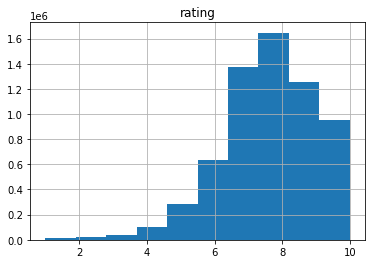

In [15]:
anime_ratings.hist('rating')

# Average number of ratings given by a user 

In [16]:
np.average(anime_ratings['user_id'].value_counts().values)

91.05231321839081

# Preprocessing

# Encoding columns

In [17]:
column = anime_ratings['user_id']
column_unique = column.unique()


In [18]:
column_unique

array([    1,     2,     3, ..., 73514, 73515, 73516], dtype=int64)

In [19]:
key_to_index = {key:index for index,key in enumerate(column_unique)}

In [20]:
#[key_to_index[i] for i in column]

In [21]:
def encode_column(column):
    keys = column.unique()
    key_to_index = {key:index for index,key in enumerate(keys)}
    num_keys = len(keys)
    encoded_column  = [key_to_index[i] for i in column]
    return key_to_index,encoded_column,num_keys

# try label encoding using sklearn

In [22]:
encode_column(anime_ratings['user_id'])

({1: 0,
  2: 1,
  3: 2,
  5: 3,
  7: 4,
  8: 5,
  9: 6,
  10: 7,
  11: 8,
  12: 9,
  14: 10,
  15: 11,
  16: 12,
  17: 13,
  18: 14,
  19: 15,
  20: 16,
  21: 17,
  22: 18,
  23: 19,
  24: 20,
  25: 21,
  26: 22,
  27: 23,
  28: 24,
  29: 25,
  30: 26,
  31: 27,
  32: 28,
  33: 29,
  34: 30,
  35: 31,
  36: 32,
  37: 33,
  38: 34,
  39: 35,
  40: 36,
  41: 37,
  42: 38,
  43: 39,
  44: 40,
  45: 41,
  46: 42,
  47: 43,
  48: 44,
  50: 45,
  51: 46,
  52: 47,
  53: 48,
  55: 49,
  56: 50,
  57: 51,
  58: 52,
  59: 53,
  60: 54,
  61: 55,
  62: 56,
  63: 57,
  64: 58,
  65: 59,
  66: 60,
  67: 61,
  68: 62,
  69: 63,
  70: 64,
  71: 65,
  72: 66,
  73: 67,
  74: 68,
  75: 69,
  76: 70,
  77: 71,
  78: 72,
  79: 73,
  80: 74,
  81: 75,
  82: 76,
  83: 77,
  84: 78,
  85: 79,
  86: 80,
  87: 81,
  88: 82,
  90: 83,
  91: 84,
  92: 85,
  93: 86,
  94: 87,
  95: 88,
  96: 89,
  97: 90,
  98: 91,
  99: 92,
  100: 93,
  101: 94,
  102: 95,
  103: 96,
  104: 97,
  105: 98,
  106: 99,
  107: 100

In [23]:
def encode_df(anime_df):
    anime_ids,anime_df['anime_id'],num_anime = encode_column(anime_df['anime_id'])
    user_ids,anime_df['user_id'],num_users = encode_column(anime_df['user_id'])
    return anime_df,num_users,num_anime,user_ids,anime_ids
    
    

In [24]:
anime_df,num_users,num_anime,user_ids,anime_ids = encode_df(anime_ratings)

<ipython-input-23-106c238ab810>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_ids,anime_df['anime_id'],num_anime = encode_column(anime_df['anime_id'])
<ipython-input-23-106c238ab810>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_ids,anime_df['user_id'],num_users = encode_column(anime_df['user_id'])


In [25]:
print("Number of users :", num_users)
print("Number of anime :", num_anime)
anime_df.head()

Number of users : 69600
Number of anime : 9927


,user_id,anime_id,rating
0,0,0,10
1,0,1,10
2,0,2,10
3,0,3,10
4,1,4,10


# Create Embeddings

# Factors for embeddings -3

# try other random values

# google how to set randomization constant

In [26]:
def create_embeddings(n,K):
    return 11 * (np.random.random((n,K)))/K
    

# pLAY WITH THE EMBEDDING FACTOR

In [27]:
emb_user = create_embeddings(num_users,3)
emb_anime = create_embeddings(num_anime,3)

In [28]:
emb_user

array([[3.2175915 , 1.27660067, 1.30343505],
       [1.14991568, 2.53777473, 0.78245608],
       [1.18079366, 0.54728928, 0.94740889],
       ...,
       [1.60803734, 2.18538713, 0.61073674],
       [1.12939191, 1.20103874, 0.29831527],
       [0.48814451, 0.84063755, 2.23439836]])

In [29]:
emb_anime

array([[1.94247277, 0.76819088, 1.08698275],
       [0.43771529, 0.41164914, 3.61337182],
       [2.39231456, 1.86737627, 3.5823526 ],
       ...,
       [0.04377575, 2.83928464, 2.24205358],
       [2.33192253, 1.69086705, 0.25629321],
       [2.72765346, 2.07500149, 0.97507023]])

In [30]:
anime_df['rating'].values

array([10, 10, 10, ..., 10,  9,  9], dtype=int64)

In [31]:
def create_sparse_matrix(anime_df,rows,cols,col_name='rating'):
    return csc_matrix((anime_df[col_name].values,(anime_df['user_id'].values,anime_df['anime_id'].values)),(rows, cols))

In [32]:
create_sparse_matrix(anime_df,num_users,num_anime).todense()

matrix([[10, 10, 10, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 6,  0,  9, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 9,  0,  9, ...,  0,  0,  0],
        [ 9,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [33]:
create_sparse_matrix(anime_df,num_users,num_anime).toarray()

array([[10, 10, 10, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 6,  0,  9, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 9,  0,  9, ...,  0,  0,  0],
       [ 9,  0,  0, ...,  0,  0,  0]], dtype=int64)

# Training

In [34]:
#cost

In [35]:
#train
Y = create_sparse_matrix(anime_df,num_users,num_anime)

In [36]:
Y.shape

(69600, 9927)

In [37]:
emb_user.shape

(69600, 3)

In [38]:
emb_anime.shape

(9927, 3)

In [39]:
#np.sum(np.dot(emb_user,np.transpose(emb_anime))

In [40]:
# np.multiply(emb_anime[anime_df['anime_id']],emb_user[anime_df['user_id']]).shape

In [41]:
#anime_df

In [42]:
#emb_anime

In [43]:
#emb_anime.shape

In [44]:
#emb_anime[anime_df['anime_id']].shape

In [45]:
#emb_user

In [46]:
#np.multiply(emb_user[0],emb_anime[0])

In [47]:
#np.multiply(emb_anime[0],emb_user[0])

In [48]:
Y = create_sparse_matrix(anime_df,num_users,num_anime)

In [49]:
anime_df['prediction'] = np.sum(np.multiply(emb_user[anime_df['user_id']],emb_anime[anime_df['anime_id']]),axis=1)

In [50]:
anime_df

,user_id,anime_id,rating,prediction
0,0,0,10,8.647568
1,0,1,10,6.643696
2,0,2,10,14.750749
3,0,3,10,3.130954
4,1,4,10,2.137609
...,...,...,...,...
6337236,69598,56,7,3.757625
6337237,69598,1802,9,4.030189
6337238,69598,783,10,1.927038
6337239,69599,753,9,9.161548


In [51]:
#finding cost

In [52]:
anime_df['prediction'] = np.sum(np.multiply(emb_user[anime_df['user_id']],emb_anime[anime_df['anime_id']]),axis=1)
actual = create_sparse_matrix(anime_df,num_users,num_anime)
predicted = create_sparse_matrix(anime_df,num_users,num_anime,'prediction')

In [84]:
actual.todense()

matrix([[10, 10, 10, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 6,  0,  9, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 9,  0,  9, ...,  0,  0,  0],
        [ 9,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [85]:
predicted.todense()

matrix([[ 8.64734872,  6.64316657, 14.74368361, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 3.7438219 ,  0.        ,  7.23748171, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 3.44065469,  0.        ,  6.01021588, ...,  0.        ,
          0.        ,  0.        ],
        [ 4.02269788,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]])

In [53]:
cost = np.sum((actual-predicted).power(2))/anime_df.shape[0] 
cost

34.98214073539406

In [54]:
#learning

In [55]:
lmbda = 0.0002

In [56]:
learning_rate=0.01

In [57]:

delta =(actual-predicted)
grad_user = (-2/anime_df.shape[0])*(delta*emb_anime) + 2*lmbda*emb_user
grad_anime = (-2/anime_df.shape[0])*(delta.T*emb_user) + 2*lmbda*emb_anime

In [58]:
emb_user = emb_user - learning_rate*grad_user
emb_anime = emb_anime - learning_rate*grad_anime

In [59]:
anime_df['prediction'] = np.sum(np.multiply(emb_user[anime_df['user_id']],emb_anime[anime_df['anime_id']]),axis=1)
actual = create_sparse_matrix(anime_df,num_users,num_anime)
predicted = create_sparse_matrix(anime_df,num_users,num_anime,'prediction')

In [60]:
cost = np.sum((actual-predicted).power(2))/anime_df.shape[0] 
cost

34.970535646337375

In [61]:
anime_df

,user_id,anime_id,rating,prediction
0,0,0,10,8.647349
1,0,1,10,6.643167
2,0,2,10,14.743684
3,0,3,10,3.132341
4,1,4,10,2.138814
...,...,...,...,...
6337236,69598,56,7,3.757515
6337237,69598,1802,9,4.030116
6337238,69598,783,10,1.927226
6337239,69599,753,9,9.160824


In [62]:
def predict(df,emb_user,emb_anime):
    df['prediction'] = np.sum(np.multiply(emb_user[df['user_id']],emb_anime[anime_df['anime_id']]),axis=1)
    return df

In [63]:
def calculateCost(df,emb_user,emb_anime):
    actual =create_sparse_matrix(df,emb_user.shape[0],emb_anime.shape[0])
    predicted = create_sparse_matrix(predict(df,emb_user,emb_anime),num_users,num_anime,'prediction')
    return np.sum((actual-predicted).power(2))/anime_df.shape[0]

In [64]:
def gradient(df,emb_user,emb_anime):
    actual =create_sparse_matrix(df,emb_user.shape[0],emb_anime.shape[0])
    predicted = create_sparse_matrix(predict(df,emb_user,emb_anime),num_users,num_anime,'prediction')
    delta = actual - predicted
    grad_user = (-2/df.shape[0])*(delta*emb_anime) + 2*lmbda*emb_user
    grad_anime = (-2/df.shape[0])*(delta.T*emb_user) + 2*lmbda*emb_anime
    return grad_user, grad_anime

# paly with learning rate and beta value

In [65]:
def training(df,emb_user,emb_anime,iteration=1000,learning_rate=0.01):
    beta =0.9
    
    grad_user, grad_anime = gradient(df, emb_user, emb_anime)
    v_user = grad_user
    v_anime = grad_anime
    for i in range(iteration):
        grad_user, grad_anime = gradient(df, emb_user, emb_anime)
        v_user = beta*v_user + (1-beta)*grad_user
        v_anime = beta*v_anime + (1-beta)*grad_anime
        emb_user = emb_user - learning_rate*v_user
        emb_anime = emb_anime - learning_rate*v_anime
        
        if((i+1)%50==0):
            cost = calculateCost(df,emb_user,emb_anime)
            print("\ncost in {}th iteration:".format(i+1),cost)
            
        
    return emb_user,emb_anime
    

# Find out stochastic gradient descent,other kinds of gradient descen

# Find what beta does.Run training with and without beta and see the difference in loss

In [ ]:
def training_without_beta(df,emb_user,emb_anime,iteration=1000,learning_rate=0.01):
    #beta =0.9
    
    grad_user, grad_anime = gradient(df, emb_user, emb_anime)
    v_user = grad_user
    v_anime = grad_anime
    for i in range(iteration):
        grad_user, grad_anime = gradient(df, emb_user, emb_anime)
        #v_user = beta*v_user + (1-beta)*grad_user
        #v_anime = beta*v_anime + (1-beta)*grad_anime
        emb_user = emb_user - learning_rate*v_user
        emb_anime = emb_anime - learning_rate*v_anime
        
        if((i+1)%50==0):
            cost = calculateCost(df,emb_user,emb_anime)
            print("\ncost in {}th iteration:".format(i+1),cost)
            
        
    return emb_user,emb_anime

# Using momentum while learning

In [66]:
# def training(df,emb_user,emb_anime,iteration=100,learning_rate=0.01):
#     actual = create_sparse_matrix(anime_df,num_users,num_anime)
#     anime_df['prediction'] = np.sum(np.multiply(emb_user[anime_df['user_id']],emb_anime[anime_df['anime_id']]),axis=1)
#     predicted = create_sparse_matrix(anime_df,num_users,num_anime,'prediction')
#     delta =(actual-predicted)
#     grad_user = (-2/anime_df.shape[0])*(delta*emb_anime) + 2*lmbda*emb_user
#     grad_anime = (-2/anime_df.shape[0])*(delta.T*emb_user) + 2*lmbda*emb_anime
#     beta =0.9
    
#     v_user = grad_user
#     v_anime = grad_anime
#     for i in range(iteration):
#         anime_df['prediction'] = np.sum(np.multiply(emb_user[anime_df['user_id']],emb_anime[anime_df['anime_id']]),axis=1)
        
#         predicted = create_sparse_matrix(anime_df,num_users,num_anime,'prediction')
#         cost = np.sum((actual-predicted).power(2))/anime_df.shape[0]
#         if((i+1)%50==0):
#             print("\ncost in {}th iteration:".format(i+1),cost)
#             print(emb_user[0])
#             print(anime_df['prediction'][0])
#         delta =(actual-predicted)
#         grad_user = (-2/anime_df.shape[0])*(delta*emb_anime) + 2*lmbda*emb_user
#         grad_anime = (-2/anime_df.shape[0])*(delta.T*emb_user) + 2*lmbda*emb_anime
#         v_user = beta*v_user + (1-beta)*grad_user
#         v_anime = beta*v_anime + (1-beta)*grad_anime
#         emb_user = emb_user - learning_rate * v_user
#         emb_anime = emb_anime - learning_rate * v_anime
#     return emb_user,emb_anime
    

# Try out different learning rates

In [67]:
emb_user,emb_anime = training(anime_df,emb_user,emb_anime,iteration=1000,learning_rate = 1)


cost in 50th iteration: 16.17901758022202

cost in 100th iteration: 12.342997604748453

cost in 150th iteration: 10.513454363805955

cost in 200th iteration: 9.410850938481088

cost in 250th iteration: 8.662491965720609

cost in 300th iteration: 8.115552070671853

cost in 350th iteration: 7.69530571351772

cost in 400th iteration: 7.360771127860899

cost in 450th iteration: 7.08755880449417

cost in 500th iteration: 6.860235328512527

cost in 550th iteration: 6.668554170578779

cost in 600th iteration: 6.505442127171599

cost in 650th iteration: 6.365854290113766

cost in 700th iteration: 6.246089199048778

cost in 750th iteration: 6.143361881235144

cost in 800th iteration: 6.055528308369749

cost in 850th iteration: 5.980902318816797

cost in 900th iteration: 5.918130926958557

cost in 950th iteration: 5.866107576724498

cost in 1000th iteration: 5.823910675547537


In [80]:
emb_user,emb_anime = training(anime_df,emb_user,emb_anime,iteration=1000,learning_rate = 2)



cost in 50th iteration: 5.766281590021815

cost in 100th iteration: 5.739950795524267

cost in 150th iteration: 5.740927868122896

cost in 200th iteration: 5.765991608429979

cost in 250th iteration: 5.81233624305716

cost in 300th iteration: 5.877476007929783

cost in 350th iteration: 5.959168765437733

cost in 400th iteration: 6.055364544564315

cost in 450th iteration: 6.164171540875379

cost in 500th iteration: 6.28383361295886

cost in 550th iteration: 6.412715334558581

cost in 600th iteration: 6.549292049517585

cost in 650th iteration: 6.69214325146907

cost in 700th iteration: 6.83994815461827

cost in 750th iteration: 6.991482665282802

cost in 800th iteration: 7.145617187027294

cost in 850th iteration: 7.30131484394391

cost in 900th iteration: 7.457629815654881

cost in 950th iteration: 7.613705560638424

cost in 1000th iteration: 7.768772770956706
